In [119]:
#The necessary python libraries imported:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway,ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor


In [120]:
#Opening the dataset in python for assessment
data = pd.read_csv("Question 1.csv")
data.head()

Department            Department_Name                        Division  \
0        ABS  Alcohol Beverage Services           ABS 85 Administration   
1        ABS  Alcohol Beverage Services           ABS 85 Administration   
2        ABS  Alcohol Beverage Services           ABS 85 Administration   
3        ABS  Alcohol Beverage Services  ABS 85 Administrative Services   
4        ABS  Alcohol Beverage Services  ABS 85 Administrative Services   

  Gender  Base_Salary  Overtime_Pay  Longevity_Pay Grade  
0      M   175873.000          0.00            0.0    M2  
1      M   145613.360          0.00            0.0    M3  
2      F   136970.000          0.00            0.0    M3  
3      F    89432.694          0.00         2490.0    21  
4      F    78947.000        456.68         6257.7    16

In [121]:
#Carrying out data cleaning:
def missing_values(dataset):
    missing_values = dataset.isnull().sum()
    print(missing_values)

In [122]:
missing_values(data)

Department          0
Department_Name     0
Division            0
Gender              0
Base_Salary         0
Overtime_Pay        0
Longevity_Pay       0
Grade              33
dtype: int64


Reveals that there are missing values under Grade, thus the cleaning process continues

In [123]:
data.dtypes

Department          object
Department_Name     object
Division            object
Gender              object
Base_Salary        float64
Overtime_Pay       float64
Longevity_Pay      float64
Grade               object
dtype: object

Mode is being used to remove the missing values as part of the data cleaning process because under grade data type because it is a categorical data type

In [124]:
data["Grade"] = data["Grade"].fillna(data["Grade"].mode()[0])

In [125]:
missing_values(data)

Department         0
Department_Name    0
Division           0
Gender             0
Base_Salary        0
Overtime_Pay       0
Longevity_Pay      0
Grade              0
dtype: int64


So now there are no missing values

Number 1

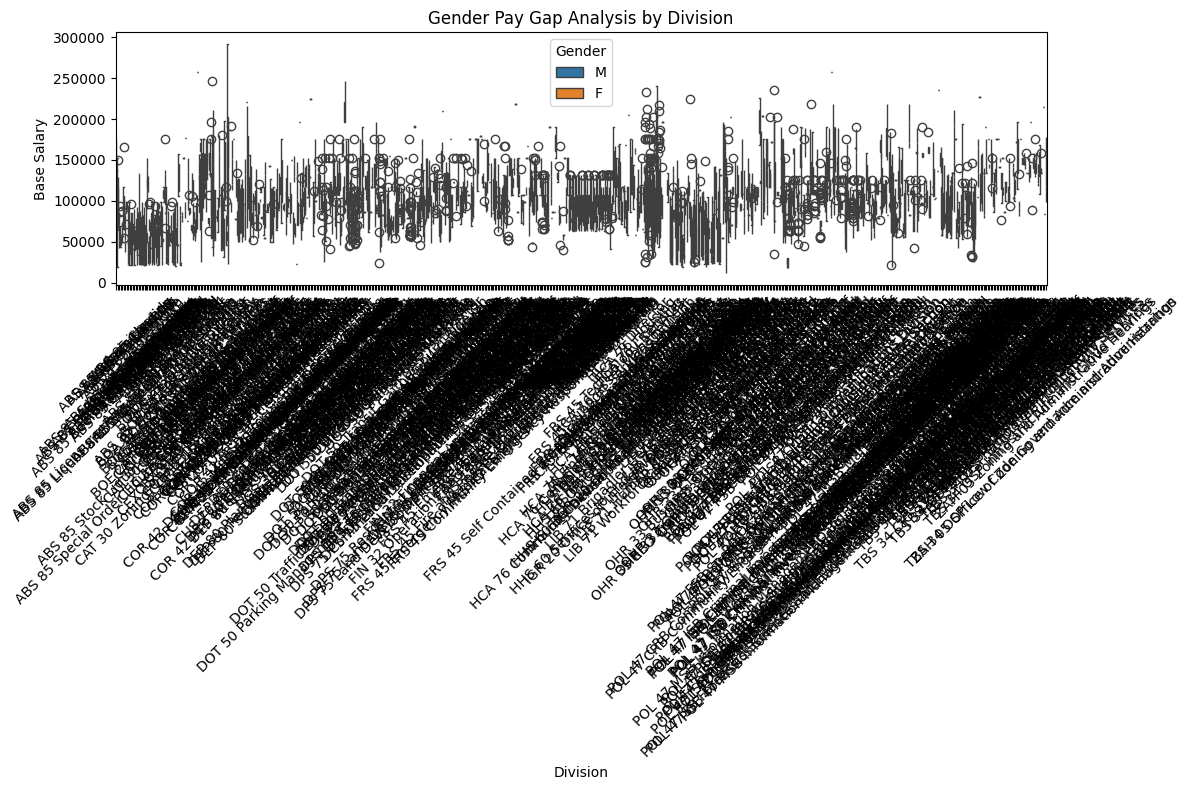

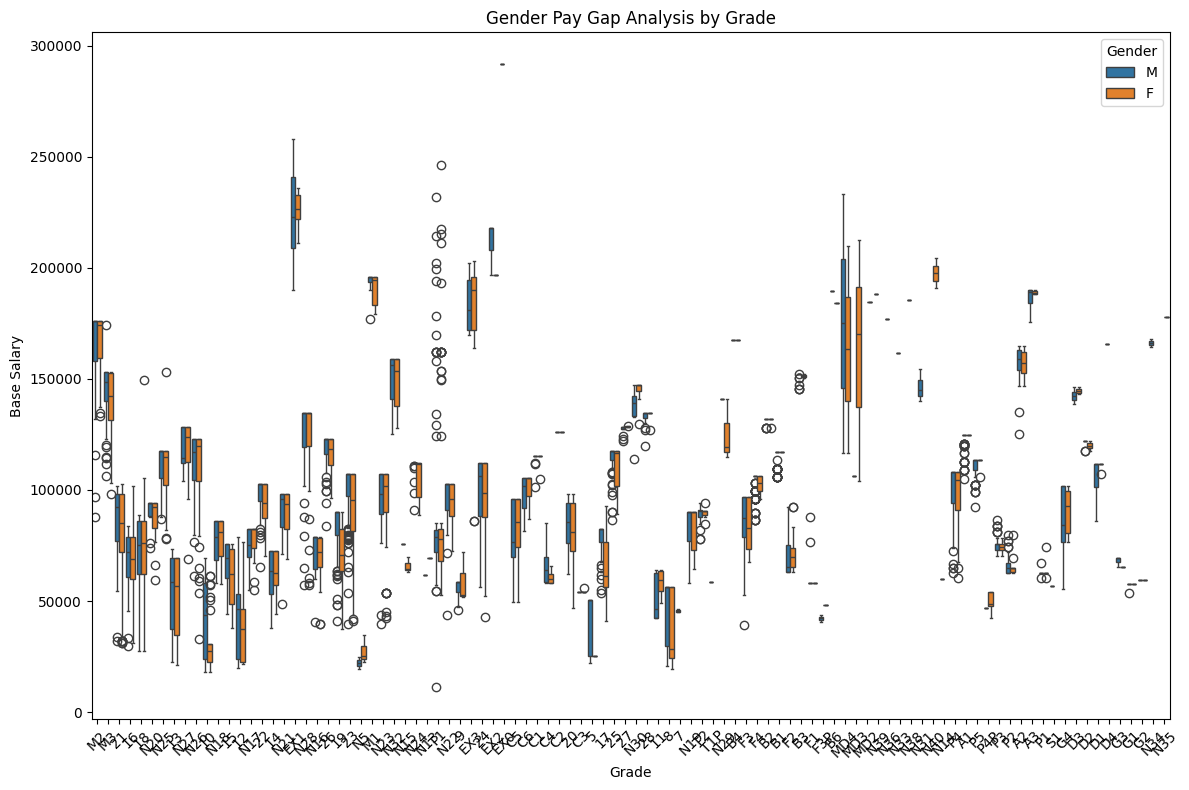

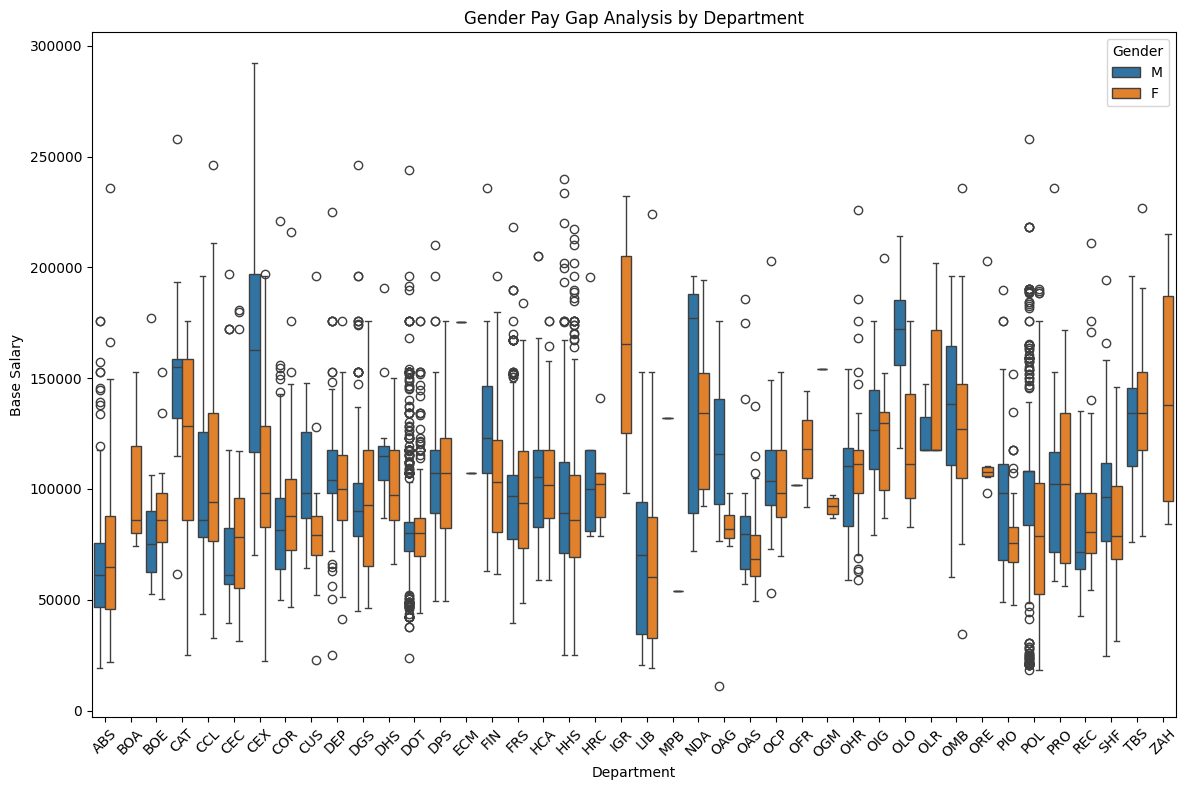

In [126]:
# visualization of Gender Pay Gap Analysis
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Division', y='Base_Salary', hue='Gender')
plt.title('Gender Pay Gap Analysis by Division')
plt.xlabel('Division')
plt.ylabel('Base Salary')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Grade', y='Base_Salary', hue='Gender')
plt.title('Gender Pay Gap Analysis by Grade')
plt.xlabel('Grade')
plt.ylabel('Base Salary')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Department', y='Base_Salary', hue='Gender')
plt.title('Gender Pay Gap Analysis by Department')
plt.xlabel('Department')
plt.ylabel('Base Salary')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

The illustrations display the correlation between the categorical data and the continous data. 

It is difficult to form a conclusive observation from the illustrations because of the stochasticity of variables so a set of statistical tests will be performed to form a conclusive observation in this regard.

In [127]:
# Define tje function to perform t-test for each category
def gender_pay_gap_test(data, category):
    categories = data[category].unique()
    p_values = {}
    for cat in categories:
        group1 = data[(data[category] == cat) & (data['Gender'] == 'M')]['Base_Salary']
        group2 = data[(data[category] == cat) & (data['Gender'] == 'F')]['Base_Salary']
        _, p_value = ttest_ind(group1, group2)
        p_values[cat] = p_value
    return p_values

# Carry out t-tests for each category: Division, Grade, Department
division_p_values = gender_pay_gap_test(data, 'Division')
grade_p_values = gender_pay_gap_test(data, 'Grade')
department_p_values = gender_pay_gap_test(data, 'Department')

def interpret_p_values(p_values):
    significance_threshold = 0.05
    significant_categories = [cat for cat, p_value in p_values.items() if p_value < significance_threshold]
    insignificant_categories = [cat for cat, p_value in p_values.items() if p_value >= significance_threshold]
    return significant_categories, insignificant_categories

# Interpret p-values for each category
significant_divisions, insignificant_divisions = interpret_p_values(division_p_values)
significant_grades, insignificant_grades = interpret_p_values(grade_p_values)
significant_departments, insignificant_departments = interpret_p_values(department_p_values)

# Print interpretation for each category
print("Significant Divisions:", significant_divisions)
print("Insignificant Divisions:", insignificant_divisions)

print("\nSignificant Grades:", significant_grades)
print("Insignificant Grades:", insignificant_grades)

print("\nSignificant Departments:", significant_departments)
print("Insignificant Departments:", insignificant_departments)

c:\Users\Hello\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Hello\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


Significant Divisions: ['ABS 85 Aspen Hill', 'CEC 16 Wheaton Urban District', "CEX 15 Chief Administrative Officer's Office", 'COR 42 DS MCCF Unit 1 Security', 'COR 42 PRRS Facility and Security', 'CUS 70 Core Services Team', 'DEP 80 Administration and Operations', 'DGS 36 Facilities Maintenance', 'DGS 36 Fleet Management Services', 'DGS 36 Property Management', 'DOT 50 Director Transportation Policy', 'DOT 50 Parking Management Financial Management', 'DOT 50 Traffic Engineering and Operations', 'DOT 50 Transit Services', 'FIN 32 General Accounting', 'FRS 45 Field Operations Administration', 'FRS 45 Station 10', 'FRS 45 Station 29', 'HCA 76 Multi-Family Housing Program', 'HHS 60 Chief Operating Officer Division', 'HHS 60 Children Youth and Family Services Division', 'HHS 60 Services to End and Prevent Homelessness Division', 'LIB 71 White Oak Library', 'LIB 71 Germantown Library', 'LIB 71 Noyes Library', 'OAS 38 Animal Services Division', 'POL 47 PSB 5th District Patrol', 'POL 47 PSB 6


Number 2

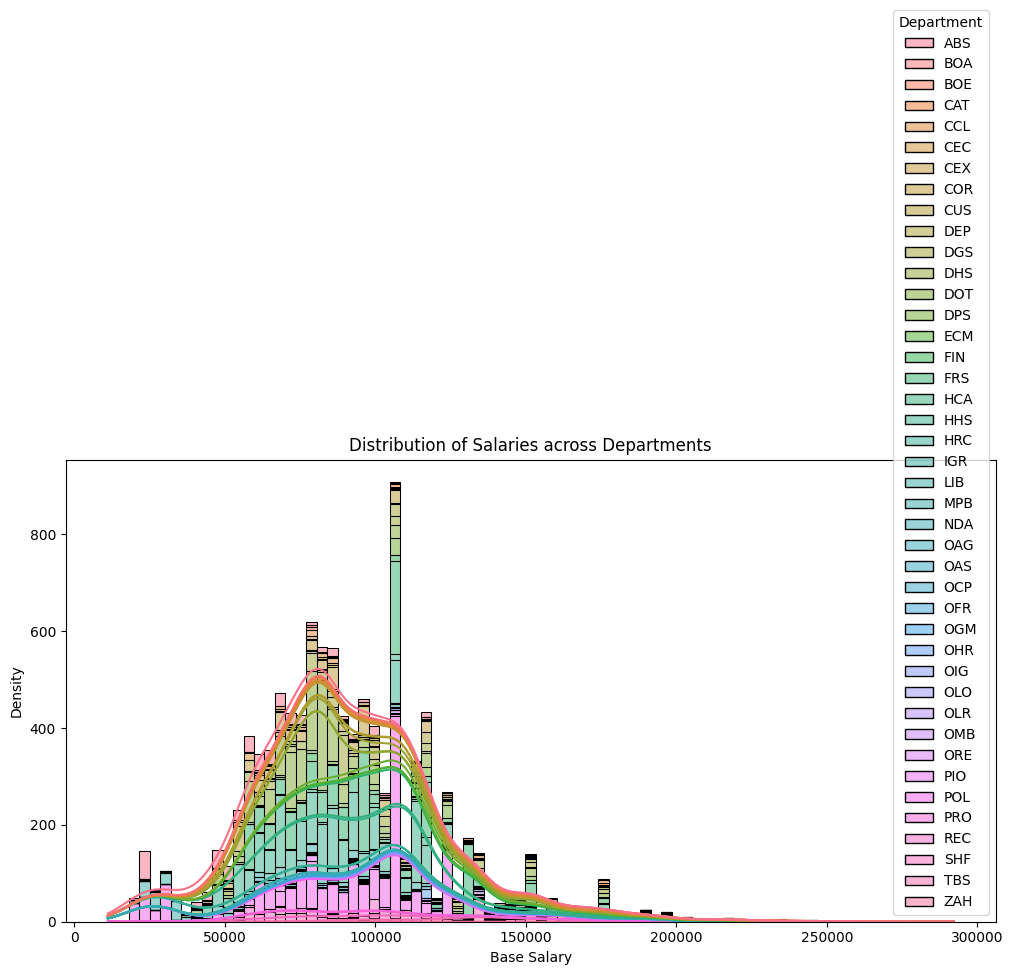

c:\Users\Hello\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\distributions.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)
c:\Users\Hello\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\distributions.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)
C:\Users\Hello\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating lege

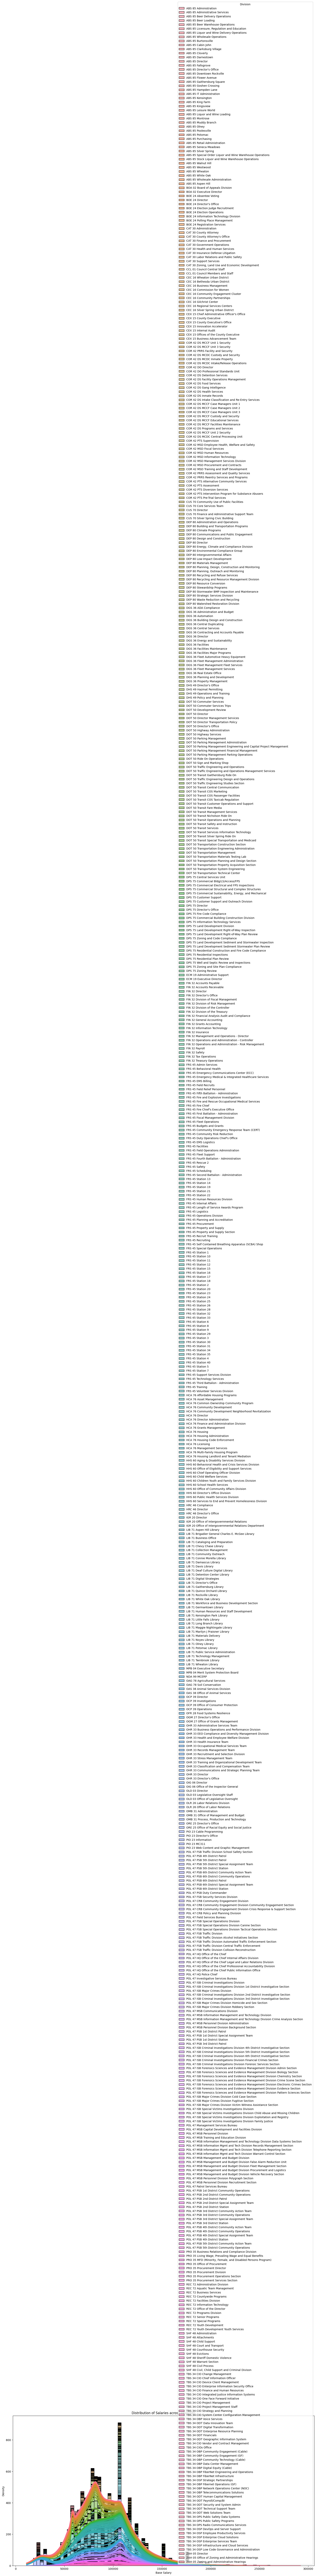

In [128]:
# Distribution of Salaries across Departments
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Base_Salary', hue='Department', multiple='stack', kde=True)
plt.title('Distribution of Salaries across Departments')
plt.xlabel('Base Salary')
plt.ylabel('Density')
plt.show()

# Distribution of Salaries across Divisions
plt.figure(figsize=(20, 10))
sns.histplot(data=data, x='Base_Salary', hue='Division', multiple='stack', kde=True)
plt.title('Distribution of Salaries across Divisions')
plt.xlabel('Base Salary')
plt.ylabel('Density')
plt.show()

Number 3

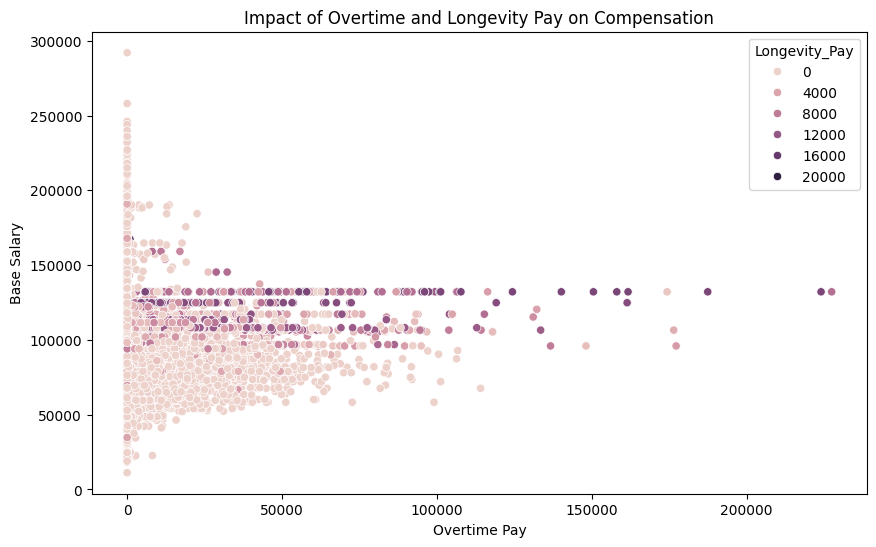

In [129]:
# Impact of Overtime and Longevity Pay on Compensation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Overtime_Pay', y='Base_Salary', hue='Longevity_Pay')
plt.title('Impact of Overtime and Longevity Pay on Compensation')
plt.xlabel('Overtime Pay')
plt.ylabel('Base Salary')
plt.show()

Part b : Creating an ML Model to predict the age of the Abalone species

In [130]:
train_data = pd.read_csv("Question 2_train.csv")
test_data = pd.read_csv("Question 2_test.csv")

Checking out for missing values

In [131]:
missing_values(train_data)

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64


In [132]:
train_data = train_data.drop_duplicates()

In [133]:
train_data.shape

(90615, 10)

Still under data cleaning, checking for outliers in the continous variables in the dataset

In [134]:
continous_variable = train_data.select_dtypes(include=['float64','int64'])
continous_variable.head()

id  Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
0   0   0.550     0.430   0.150        0.7715          0.3285          0.1465   
1   1   0.630     0.490   0.145        1.1300          0.4580          0.2765   
2   2   0.160     0.110   0.025        0.0210          0.0055          0.0030   
3   3   0.595     0.475   0.150        0.9145          0.3755          0.2055   
4   4   0.555     0.425   0.130        0.7820          0.3695          0.1600   

   Shell weight  Rings  
0        0.2400     11  
1        0.3200     11  
2        0.0050      6  
3        0.2500     10  
4        0.1975      9

In [135]:
train_data = train_data.drop(['id'],axis=1)
continous_variable = continous_variable.drop(['id'],axis=1)

Below boxplots are being created to visualize the outliers in the dataset since its a categorical variable against a continous variabe

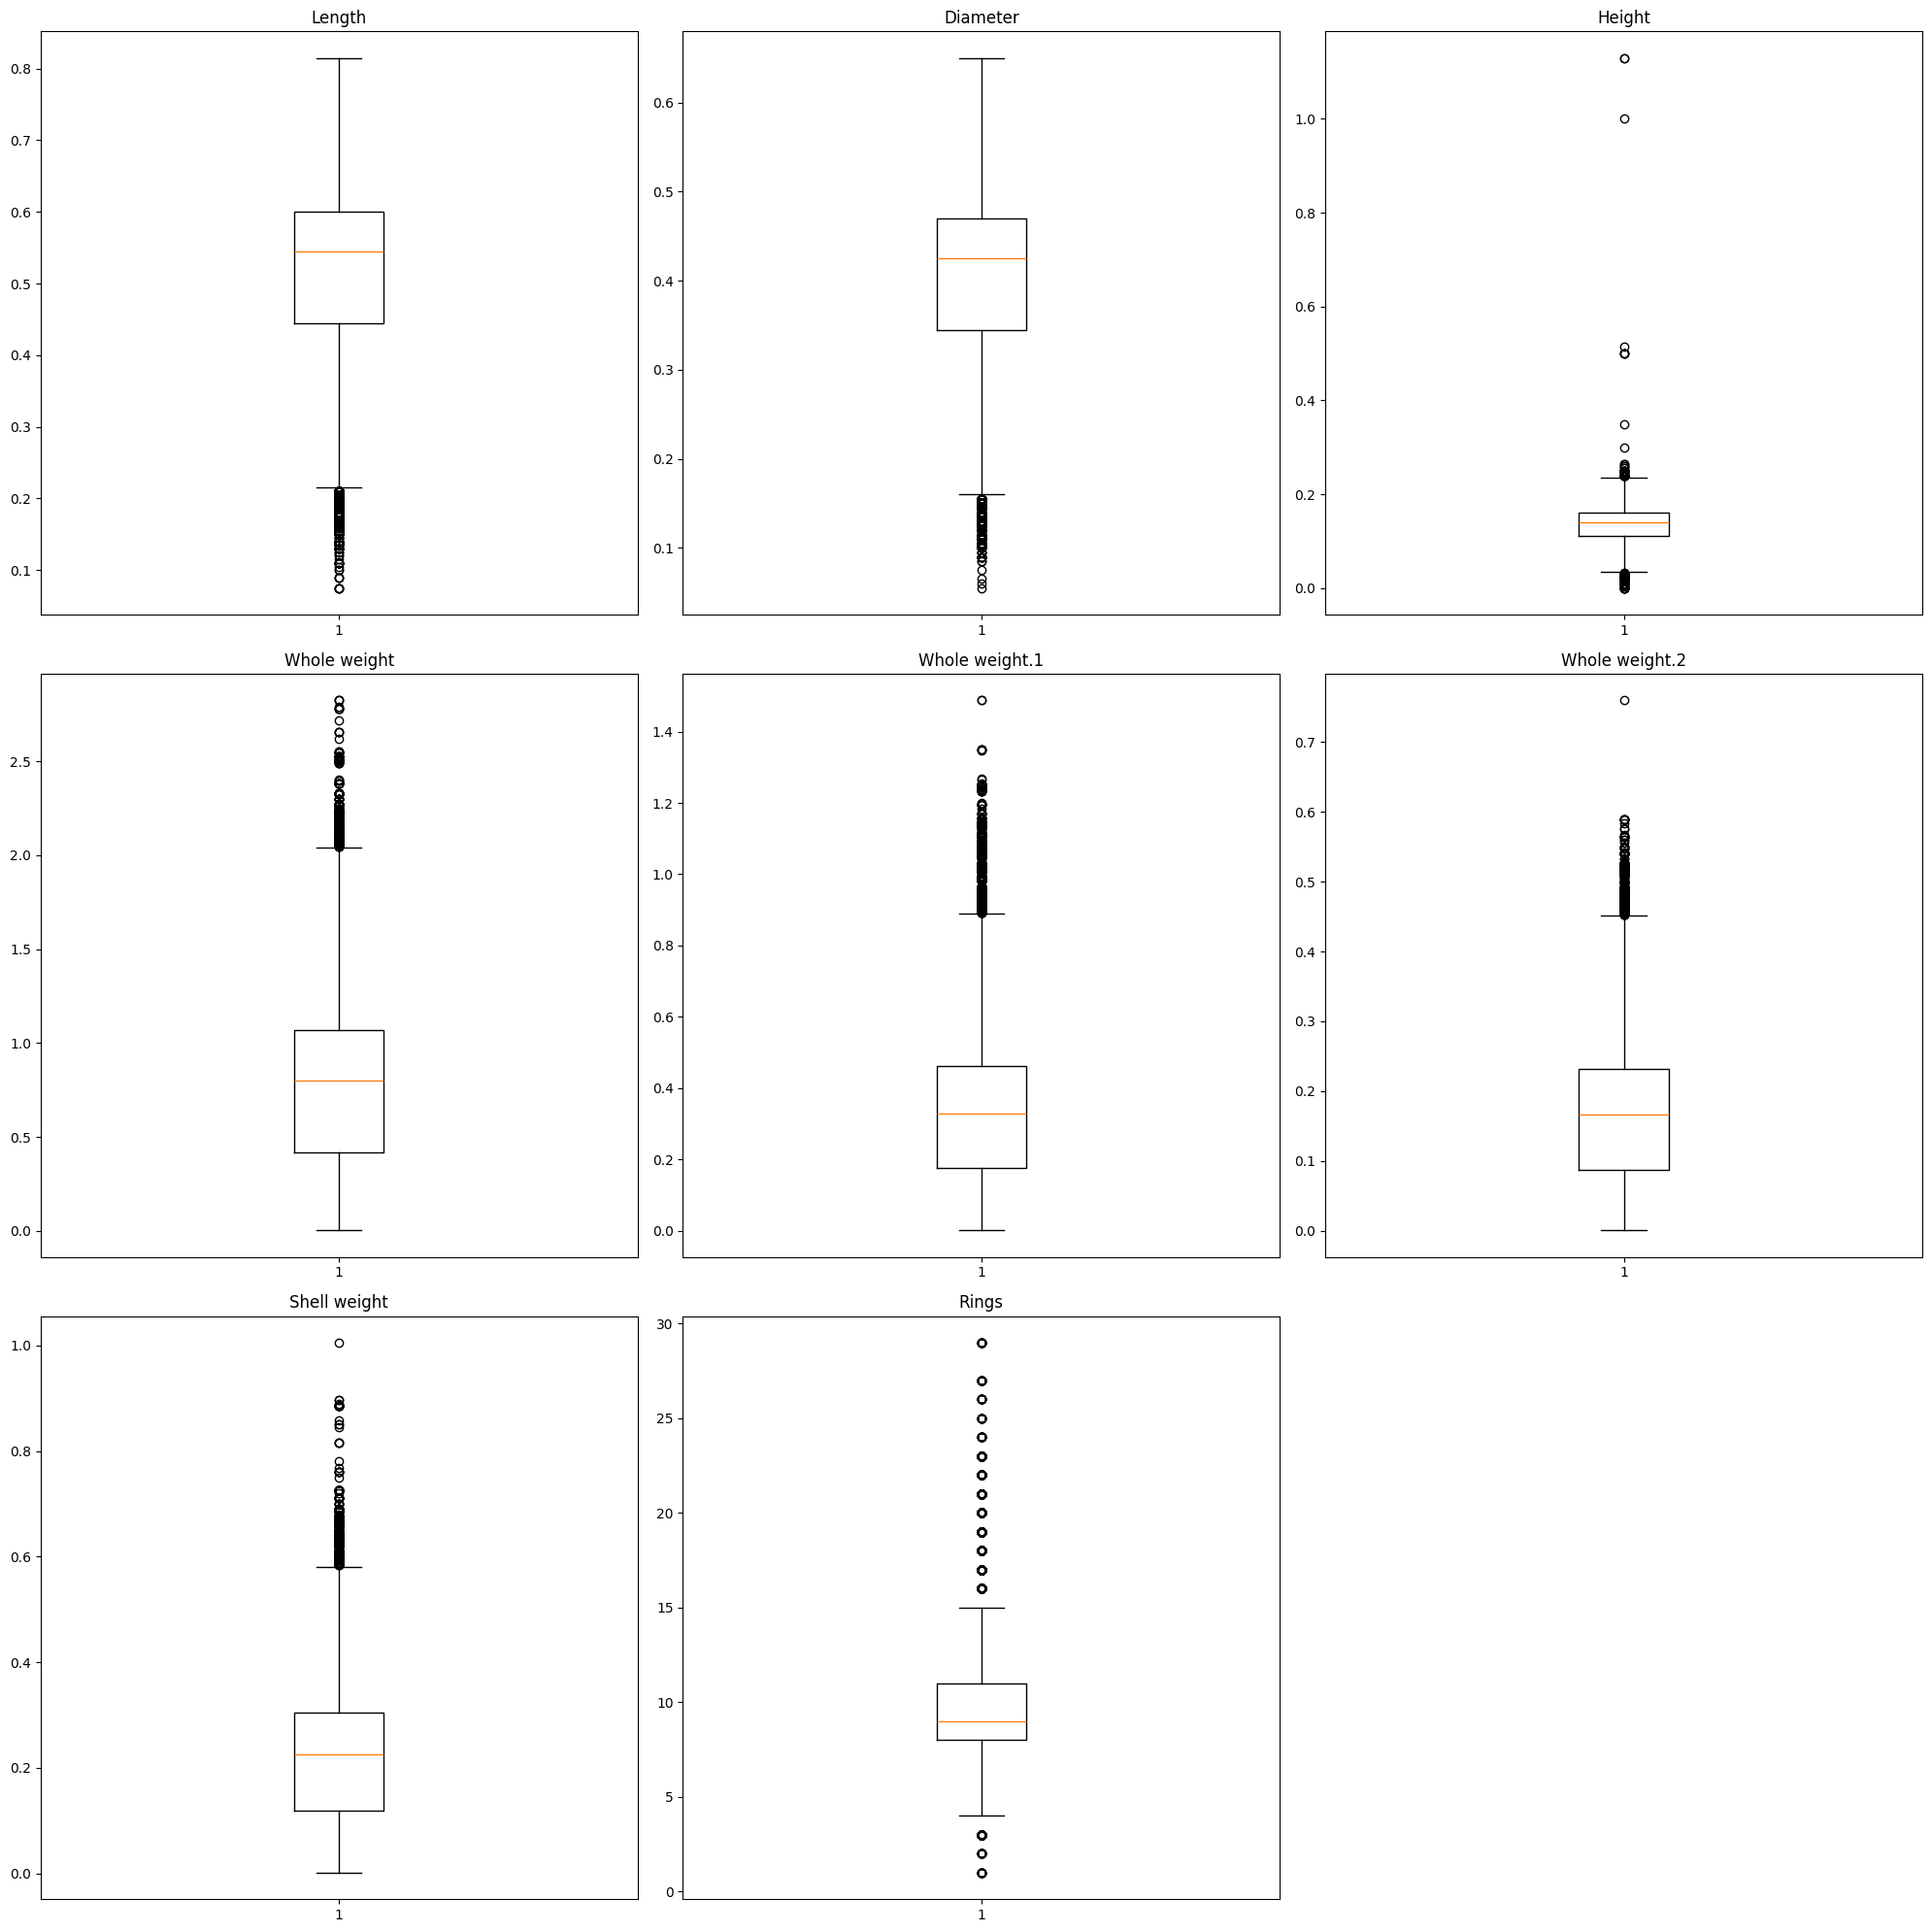

In [136]:
def visulize_outliers(dataframe):
    num_cols = len(dataframe.columns)
    nrows = (num_cols - 1) // 3 + 1
    ncols = min(num_cols, 3)
    plt.figure(figsize=(20, 20))
    for i, col in enumerate(dataframe.columns):
        plt.subplot(nrows, ncols, i + 1)
        plt.boxplot(train_data[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

visulize_outliers(continous_variable)

Removing outliers within the dataset:

In [137]:
def remove_outliers(columns):
    for i in columns:
        lower_quantile = train_data[i].quantile(0.25)
        upper_quantile = train_data[i].quantile(0.75)
        IQR = upper_quantile - lower_quantile
        upper_boundary = upper_quantile + 1.5 * IQR
        lower_boundary = upper_quantile - 1.5 * IQR
        train_data[i] = np.where(
            train_data[i] > upper_boundary, upper_boundary, train_data[i]
        )
        train_data[i] = np.where(
            train_data[i] < lower_boundary, lower_boundary, train_data[i]
            )

remove_outliers(continous_variable.columns)

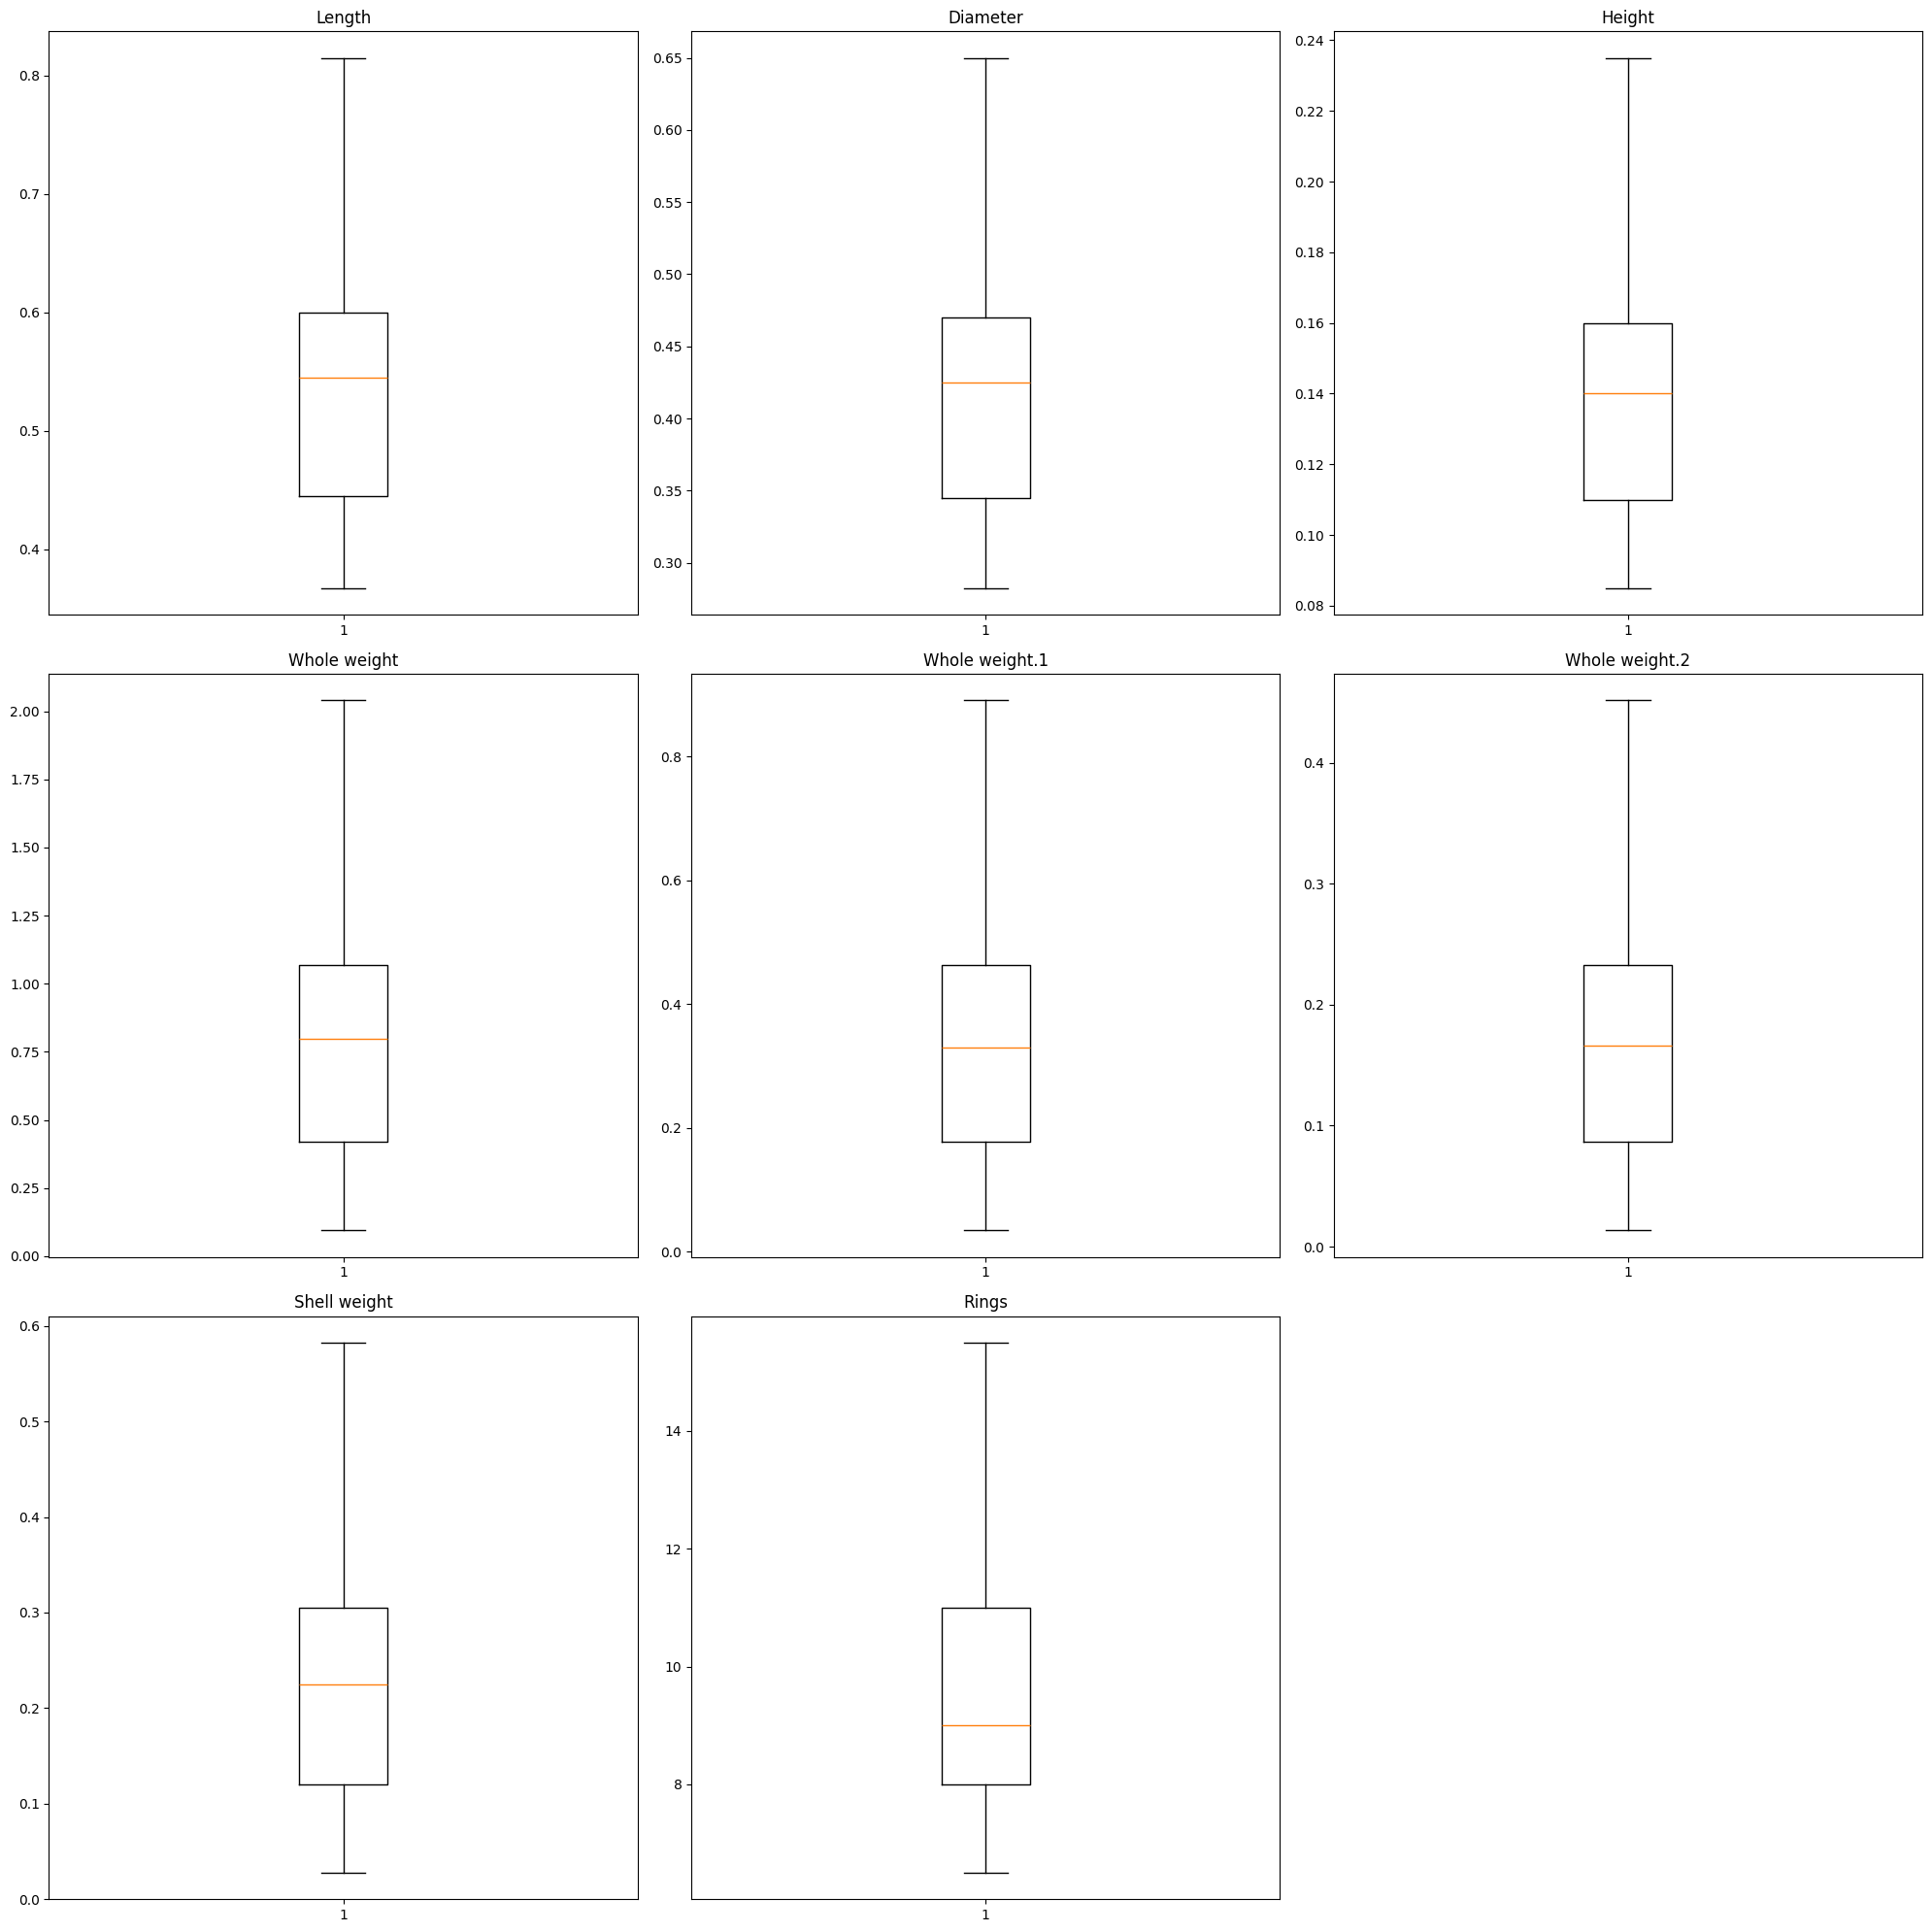

In [138]:
visulize_outliers(continous_variable)

In [139]:
train_data.head()

Sex  Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
0   F  0.5500    0.4300   0.150       0.77150         0.32850          0.1465   
1   F  0.6300    0.4900   0.145       1.13000         0.45800          0.2765   
2   I  0.3675    0.2825   0.085       0.09475         0.03475          0.0135   
3   M  0.5950    0.4750   0.150       0.91450         0.37550          0.2055   
4   I  0.5550    0.4250   0.130       0.78200         0.36950          0.1600   

   Shell weight  Rings  
0        0.2400   11.0  
1        0.3200   11.0  
2        0.0275    6.5  
3        0.2500   10.0  
4        0.1975    9.0

Illustrating the correlation between the target variable and predictors using a correlation matrix


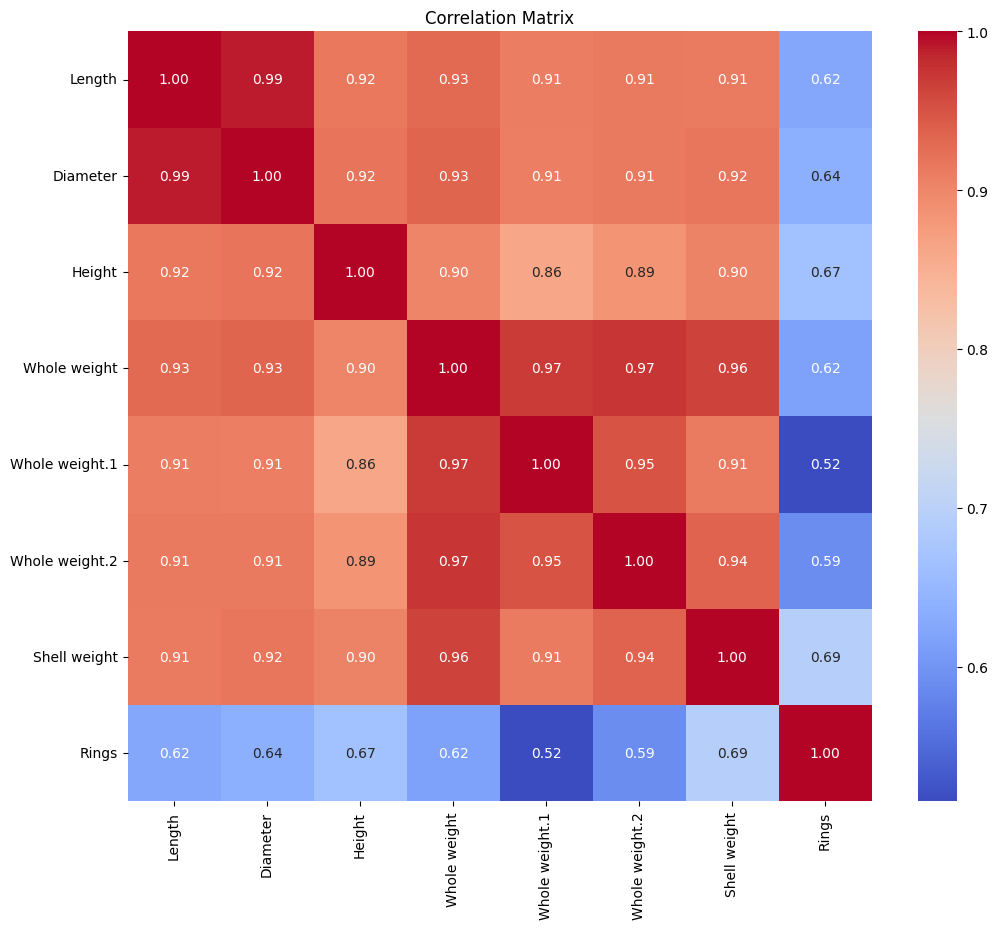

In [140]:
corr_matrix = continous_variable.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [141]:
## visualizing the target and predictor
def combined_boxplot(data,var1, var2):
    sns.boxplot(x=data[var1], y=data[var2])
    plt.xlabel(f"{var1}")
    plt.ylabel(f"{var2}")
    plt.title(f"Boxplots of {var1} vs. {var2}")
    plt.show()

def singleAnova(data, cont_var, cat_var):
    grouped_data = [
        group[cont_var].values for _, group in data.groupby(cat_var)
    ]
    f_statistic, p_value = f_oneway(*grouped_data)

    if p_value > 0.05:
        print(f"{cat_var} is not correlated with {cont_var}")
    else:
        print(f"{cat_var} is correlated with {cont_var}")

In [142]:
categorical_features = train_data.select_dtypes(include=['object']).columns
categorical_features

Index(['Sex'], dtype='object')

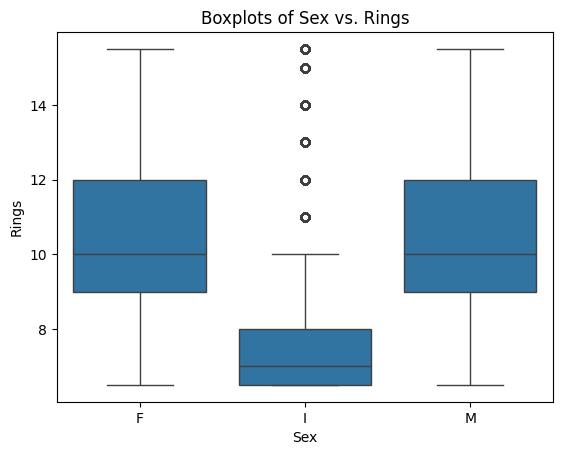

Sex is correlated with Rings


<Figure size 640x480 with 0 Axes>

In [143]:
col1 = "Rings"
col2 = 'Sex'

combined_boxplot(train_data,col2, col1)
singleAnova(train_data, col1, col2)
plt.tight_layout()
plt.show()

In [144]:
# Encoding 'Sex'
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])

In [145]:
X = train_data.drop(columns='Rings') 
y = train_data['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("Y_train",y_train.shape)
print("Y_test",y_test.shape)

X_train (72492, 8)
X_test (18123, 8)
Y_train (72492,)
Y_test (18123,)


In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# building the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicting on training set to evaluate model performance
y_train_pred = linear_model.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
print("Training RMSE:", train_rmse)
print("Training R-squared:", train_r2)

# Predicting on testing set
y_pred = linear_model.predict(X_test)

# Evaluating the model performance on testing set
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
test_r2 = r2_score(y_test, y_pred)
print("Testing RMSE:", test_rmse)
print("Testing R-squared:", test_r2)


Training RMSE: 1.5804284808151314
Training R-squared: 0.6132552833865826
Testing RMSE: 1.6051933361193633
Testing R-squared: 0.6058489100005187


In [147]:
# Train Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Predicting on training set to evaluate model performance
y_train_pred = rf_regressor.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print("Training RMSE:", train_rmse)

# Predicting on testing set
y_test_pred = rf_regressor.predict(X_test)


Training RMSE: 0.5487289111255288


In [148]:
# saving the model to pickle file
import joblib
joblib.dump(linear_model, 'Question2_model.pkl')


['Question2_model.pkl']

This is the predicted age of Abalone species using the predictors in the dataset

In [149]:
y_test_pred

array([ 8.26 ,  7.245,  9.96 , ..., 10.12 , 10.86 , 10.485])

Ensuring the data is clean.

In [150]:
missing_values(test_data)

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
dtype: int64


In [151]:
test_data.drop("id", axis=1, inplace=True)

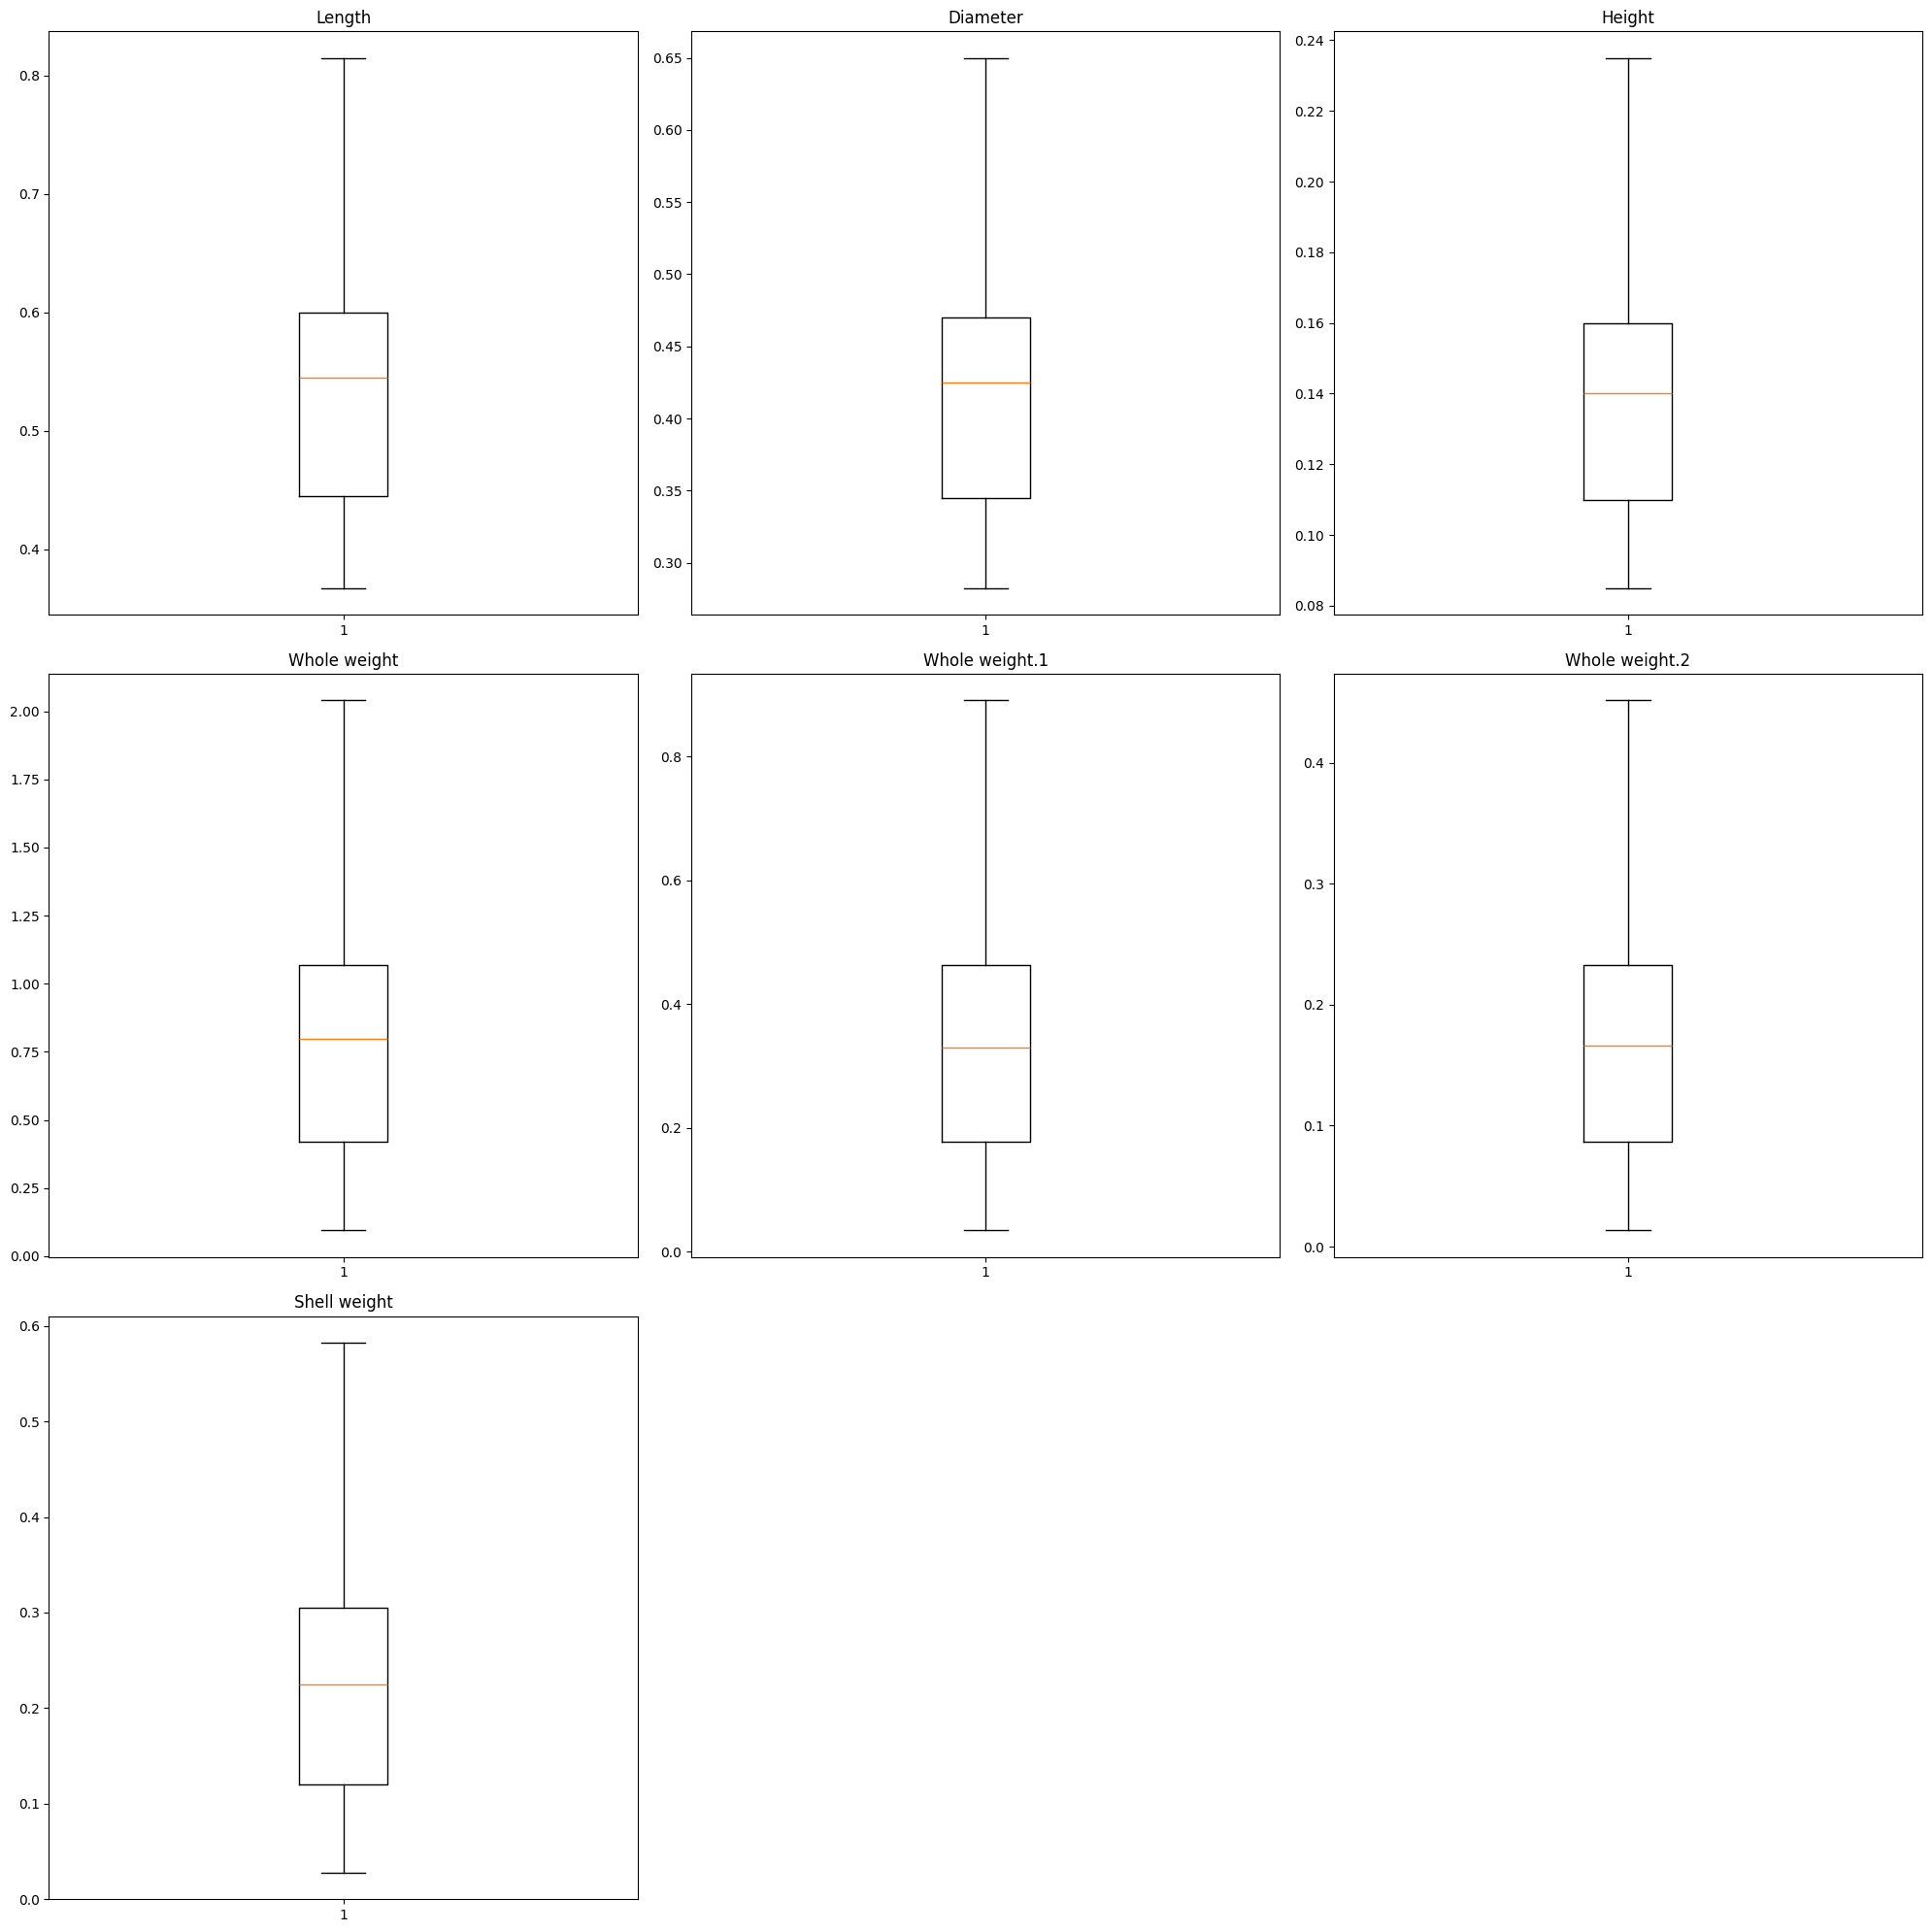

In [152]:
test_data_continous = test_data.select_dtypes(include=['float64','int64'])
visulize_outliers(test_data_continous)

In [153]:
test_data['Sex'] = label_encoder.fit_transform(test_data['Sex'])

In [154]:
test_data

Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0        2   0.645     0.475   0.155        1.2380          0.6185   
1        2   0.580     0.460   0.160        0.9830          0.4785   
2        2   0.560     0.420   0.140        0.8395          0.3525   
3        2   0.570     0.490   0.145        0.8740          0.3525   
4        1   0.415     0.325   0.110        0.3580          0.1575   
...    ...     ...       ...     ...           ...             ...   
60406    1   0.345     0.260   0.085        0.1775          0.0735   
60407    0   0.525     0.410   0.145        0.8445          0.3885   
60408    1   0.590     0.440   0.155        1.1220          0.3930   
60409    0   0.660     0.525   0.190        1.4935          0.5885   
60410    0   0.430     0.340   0.120        0.4150          0.1525   

       Whole weight.2  Shell weight  
0              0.3125        0.3005  
1              0.2195        0.2750  
2              0.1845        0.2405  
3              0.1865        0.2350  
4              0.0670        0.1050  
...               ...           ...  
60406          0.0265        0.0500  
60407          0.1670        0.2050  
60408          0.2000        0.2650  
60409          0.3575        0.4350  
60410          0.0910        0.0905  

[60411 rows x 8 columns]

In [155]:
train_data

Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0        0  0.5500    0.4300   0.150       0.77150         0.32850   
1        0  0.6300    0.4900   0.145       1.13000         0.45800   
2        1  0.3675    0.2825   0.085       0.09475         0.03475   
3        2  0.5950    0.4750   0.150       0.91450         0.37550   
4        1  0.5550    0.4250   0.130       0.78200         0.36950   
...    ...     ...       ...     ...           ...             ...   
90610    2  0.3675    0.2825   0.085       0.15850         0.06850   
90611    2  0.5550    0.4250   0.150       0.87900         0.38650   
90612    1  0.4350    0.3300   0.095       0.32150         0.15100   
90613    1  0.3675    0.2825   0.085       0.20000         0.09800   
90614    1  0.4250    0.3250   0.100       0.34550         0.15250   

       Whole weight.2  Shell weight  Rings  
0              0.1465        0.2400   11.0  
1              0.2765        0.3200   11.0  
2              0.0135        0.0275    6.5  
3              0.2055        0.2500   10.0  
4              0.1600        0.1975    9.0  
...               ...           ...    ...  
90610          0.0370        0.0450    6.5  
90611          0.1815        0.2400    9.0  
90612          0.0785        0.0815    6.5  
90613          0.0490        0.0700    6.5  
90614          0.0785        0.1050    8.0  

[90615 rows x 9 columns]

In [156]:
## Checking if the columns in the test data are the same as the training data   
def check_same_columns(df1, df2):
    columns_df1 = set(df1.columns)
    columns_df2 = set(df2.columns)

    return columns_df1 == columns_df2

are_same_columns = check_same_columns(X, test_data)
print("Do the dataframes have exactly the same columns?", are_same_columns)


Do the dataframes have exactly the same columns? True


In [157]:
linear_model = joblib.load('Question2_model.pkl')
predictions = linear_model.predict(test_data)
print("Predictions:", predictions)

Predictions: [ 8.72879344  9.85019702  9.93948708 ... 10.97342891 13.18269838
  8.2746492 ]


Number 3 (c)

In [158]:
data = pd.read_csv("Question 3.csv")

In [159]:
data.columns

Index(['Articles', 'labels'], dtype='object')

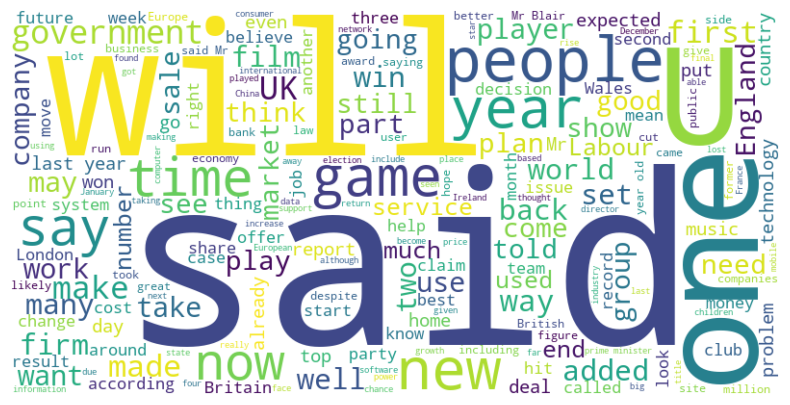

In [160]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_articles_text = ' '.join(data['Articles'])

wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_articles_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Above is an illustration of a visual representing the article

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(data['Articles'], data['labels'], test_size=0.2, random_state=42)

# Converting text data into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Training a Logistic Regression classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_tfidf, y_train)

# Predicting labels for test data
y_pred = classifier.predict(X_test_tfidf)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9640449438202248
